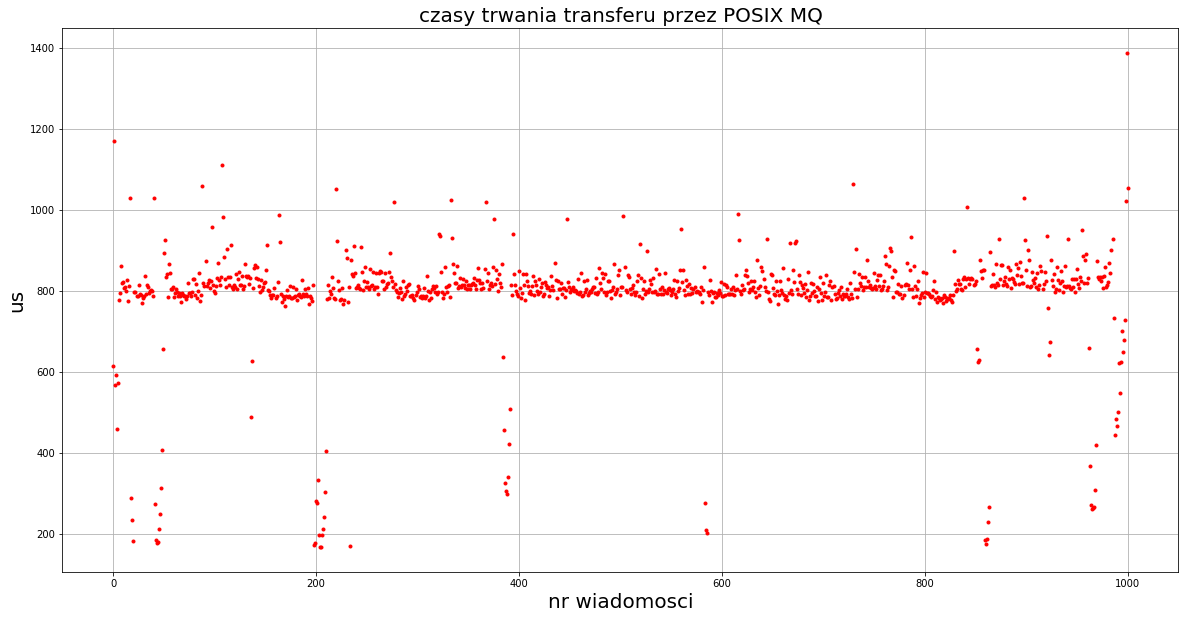

In [33]:
import sys
from os.path import abspath, join, dirname
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt


file_path = join(dirname(abspath(".")), 'time_logs.csv')

with open(file_path, 'r') as f:
    data = pd.read_csv(f)
    
transfer_dur = data['transfer_duration[us]']

fig = plt.figure(figsize=(20,10))
plt.plot(transfer_dur, 'r.')
plt.grid(True)
plt.title('czasy trwania transferu przez POSIX MQ', fontsize=20)
plt.xlabel('nr wiadomosci', fontsize=20)
plt.ylabel('us', fontsize=20)
plt.show()

In [28]:
max_opoznienie = np.max(transfer_dur)
print(f'max opoznienie: {max_opoznienie}')


max opoznienie: 2196
